In [264]:
from datetime import datetime as dt
import twitterscraper as ts
import pandas as pd
import matplotlib.pyplot as plt
import re

In [112]:
# Scrape data from twitter bot
user = "PHCovid19"
tweets = ts.query.query_tweets_from_user(user)
df = pd.DataFrame(t.__dict__ for t in tweets)

INFO: Scraping tweets from https://twitter.com/PHCovid19
INFO: Using proxy 202.142.162.50:3128
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1248229486442590214&reset_error_state=false
INFO: Using proxy 103.142.68.253:80
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1243837312561225731&reset_error_state=false
INFO: Using proxy 119.81.199.82:8123
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1240551566874038272&reset_error_state=false
INFO: Using proxy 165.227.71.60:80
INFO: Scraping tweets from https://twitter.com/i/profiles/show/PHCovid19/timeline/tweets?include_available_features=1&include_entities=1&max_position=1239841954407395329&reset_error_state=false
INFO: Using proxy 89.

In [113]:
# Filter statuses
tag = "text"
statuses = [s for s in df[tag] if s.startswith("Status")]

In [240]:
dataset = []
for s in statuses:
    entries = re.split(r"\n+", s)
    # Indices mapping
    # 0 - date, 1 - cases, 2 - deaths, 3 - recovered
    date = entries[0][13:len(entries[0]) - 1]
    date = dt.strptime(date, "%d %B %Y, %I:%M %p")
    cases = [int(s) for s in entries[1].split() if s.isdigit()][0]
    deaths = [int(s) for s in entries[2].split() if s.isdigit()][0]
    recoveries = [int(s) for s in entries[3].split() if s.isdigit()][0]
    
    # Append to dataset
    dataset.append({"date": date, "cases": cases, "deaths": deaths, "recoveries": recoveries})

covid_df = pd.DataFrame(dataset)

In [251]:
covid_df

,date,cases,deaths,recoveries
0,2020-04-28 16:22:00,7958,530,975
1,2020-04-27 16:31:00,7777,511,932
2,2020-04-26 16:20:00,7579,501,862
3,2020-04-25 16:21:00,7294,494,792
4,2020-04-24 16:22:00,7192,477,762
...,...,...,...,...
59,2020-03-18 16:39:00,202,17,7
60,2020-03-18 15:14:00,193,14,7
61,2020-03-18 13:00:00,187,14,4
62,2020-03-18 00:34:00,187,14,4


In [252]:
# Plot annotation Labeling function
def label(xs, ys, step, color, xo, yo):
    zippy = list(zip(xs, ys))
    for i in range(0, len(zippy), step):
        x, y = zippy[i]
        plt.annotate(y, (x, y), textcoords="offset points", color=color, xytext=(xo, yo), ha="center")

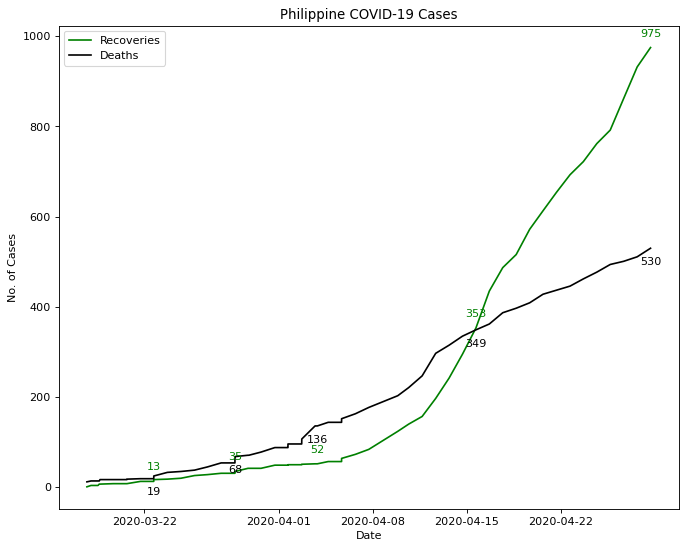

In [265]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["recoveries"]
step = 13

# Plot recoveries
label(xs, ys, step, "green", 0, 10)
plt.plot(xs, ys, color="green", label="Recoveries")

# Plot deaths
ys = covid_df["deaths"]
label(xs, ys, step, "black", 0, -15)
plt.plot(xs, ys, color="black", label="Deaths")

plt.legend(loc="upper left")
plt.show()

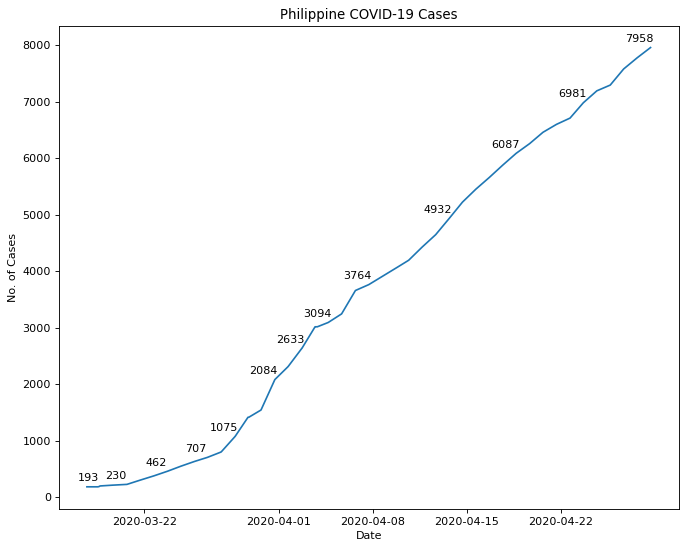

In [261]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.title("Philippine COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("No. of Cases")

xs = covid_df["date"]
ys = covid_df["cases"]

# Plot cases
label(xs, ys, 5, "black", -10, 5)
plt.plot(xs, ys, label="Cases")

plt.show()